In [1]:
import numpy
import os
import pandas
import datetime
import matplotlib.pyplot as plt
import world_bank_data as wb

In [2]:
df1 = pandas.read_csv("crunched_data.csv")

In [3]:
df_new = df1.copy()
df_new = df_new.drop(columns=['countriesAndTerritories', 'countryterritoryCode', 'continentExp'])

In [4]:
df_new_sum = pandas.DataFrame(df_new.isnull().sum(), columns = ["missing"])
df_new_max = pandas.DataFrame(df_new.max(), columns = ["max"])
df_new_min = pandas.DataFrame(df_new.min(), columns = ["min"])
df_new_mean = pandas.DataFrame(df_new.mean(), columns = ["mean"])
df_new_median = pandas.DataFrame(df_new.median(), columns = ["median"])
df_new_std = pandas.DataFrame(df_new.std(), columns = ["std"])

frames = [df_new_sum,
         df_new_max,
         df_new_min,
         df_new_mean,
         df_new_median,
         df_new_std]

df_statistics = pandas.concat(frames, axis=1)
df_statistics

,missing,max,min,mean,median,std
casesPer1000,5,6.039881e+01,0.000279,6.338400e+00,1.885771e+00,9.233949e+00
deathsPer1000,40,6.008395e-01,0.000012,9.178850e-02,3.950364e-02,1.173709e-01
NovemberCasesPercent,13,1.000000e+00,0.014286,2.881294e-01,2.499574e-01,1.707356e-01
NovemberDeathsPercent,55,1.000000e+00,0.015873,3.406324e-01,2.747083e-01,2.457075e-01
casesSinceSeptember,0,5.193334e+06,0.000000,1.351580e+05,5.078000e+03,5.372691e+05
deathsSinceSeptember,0,6.516600e+04,0.000000,2.192033e+03,6.300000e+01,7.810843e+03
popData2019,1,1.433784e+09,815.000000,3.618040e+07,6.816581e+06,1.408768e+08
casesSinceNovember,0,1.857464e+06,0.000000,3.935928e+04,1.284000e+03,1.539674e+05
deathsSinceNovember,0,1.589200e+04,0.000000,5.806808e+02,1.300000e+01,1.754988e+03
NY.GDP.PCAP.CD,14,1.858290e+05,261.247473,1.797503e+04,6.977696e+03,2.668774e+04


In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(df_new)

columns = df_new.columns

df_filled =  pandas.DataFrame(imputer.fit_transform(df_new), columns = columns)
df_filled = df_filled.join(df1['countriesAndTerritories'])
df_filled = df_filled.join(df1['countryterritoryCode'])
df_filled = df_filled.join(df1['continentExp'])
df_filled.set_index('countriesAndTerritories')

,casesPer1000,deathsPer1000,NovemberCasesPercent,NovemberDeathsPercent,casesSinceSeptember,deathsSinceSeptember,popData2019,casesSinceNovember,deathsSinceNovember,NY.GDP.PCAP.CD,EN.POP.DNST,SH.MED.BEDS.ZS,SH.MED.PHYS.ZS,SP.POP.65UP.TO.ZS,SH.STA.TRAF.P5,EN.ATM.PM25.MC.M3,countryterritoryCode,continentExp
countriesAndTerritories,,,,,,,,,,,,,,,,,,
Afghanistan,0.133485,0.005652,0.357424,0.376744,5078.0,215.0,38041757.0,1815.0,81.0,502.115487,56.937760,0.5,0.27820,2.615794,15.10,56.910808,AFG,Asia
Albania,6.237015,0.115985,0.369630,0.331325,17853.0,332.0,2862427.0,6599.0,110.0,5352.857411,104.612263,2.9,1.21640,14.202631,13.60,18.200603,ALB,Europe
Algeria,0.526629,0.014819,0.404358,0.286834,22673.0,638.0,43053054.0,9168.0,183.0,3948.343279,17.730075,1.9,1.71930,6.552778,23.80,38.884011,DZA,Africa
Andorra,60.398808,0.288801,0.230385,0.611111,4601.0,22.0,76177.0,1060.0,0.0,40886.391165,163.842553,2.5,3.33330,14.465041,7.60,10.307621,AND,Europe
Angola,0.333194,0.006599,0.279046,0.200000,10604.0,210.0,31825299.0,2959.0,42.0,2973.591160,24.713052,0.8,0.21460,2.199342,23.60,32.388505,AGO,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis_and_Futuna,0.008644,0.011059,1.000000,1.000000,1.0,0.0,36831.5,0.0,0.0,3161.530935,177.556225,2.1,0.39795,3.392263,11.15,17.675435,NaN,Oceania
Western_Sahara,6.477679,0.096792,0.120453,0.088367,0.0,0.0,582458.0,0.0,0.0,5229.344178,69.311013,2.6,0.99575,5.856752,19.75,29.779355,ESH,Africa
Yemen,0.004081,0.001337,0.075630,0.076923,119.0,39.0,29161922.0,9.0,3.0,968.159048,53.977853,0.7,0.52510,2.902141,21.50,50.456007,YEM,Asia


In [40]:
df_filled_new = df_filled.copy()
df_filled_new = df_filled.drop(columns=['countriesAndTerritories', 'countryterritoryCode', 'continentExp'])

df_filled_out = pandas.DataFrame();

from IPython.display import display

for column in df_filled_new:
    df_filled_out = pandas.DataFrame(df_filled_new[
            (df_filled_new[column] > (df_statistics['mean'][column] + 3 * df_statistics['std'][column])) | (df_filled_new[column] < (df_statistics['mean'][column] - 3 * df_statistics['std'][column]))][column]).join(df1['countriesAndTerritories']).set_index('countriesAndTerritories')
    display(df_filled_out)

,casesPer1000
countriesAndTerritories,
Andorra,60.398808
Belgium,38.914256
Czechia,40.738981
French_Polynesia,40.410334
Montenegro,35.192275


,deathsPer1000
countriesAndTerritories,
Argentina,0.600840
Czechia,0.529118
Guam,0.496130
Montenegro,0.461280


,NovemberCasesPercent
countriesAndTerritories,
Falkland_Islands_(Malvinas),1.0
Vanuatu,1.0
Wallis_and_Futuna,1.0


,NovemberDeathsPercent
countriesAndTerritories,


,casesSinceSeptember
countriesAndTerritories,
Brazil,1986648.0
India,5193334.0
United_States_of_America,4907728.0


,deathsSinceSeptember
countriesAndTerritories,
Argentina,26906.0
Brazil,44830.0
India,65166.0
Mexico,34101.0
United_States_of_America,62531.0


,popData2019
countriesAndTerritories,
China,1.433784e+09
India,1.366418e+09


,casesSinceNovember
countriesAndTerritories,
France,622615.0
India,677460.0
United_States_of_America,1857464.0


,deathsSinceNovember
countriesAndTerritories,
Brazil,6181.0
France,7681.0
India,7994.0
Iran,6556.0
Italy,6362.0
Mexico,6970.0
United_States_of_America,15892.0


,NY.GDP.PCAP.CD
countriesAndTerritories,
Anguilla,117155.015632
"Bonaire, Saint Eustatius and Saba",117155.015632
Falkland_Islands_(Malvinas),117155.015632
Gibraltar,110918.532296
Holy_See,117155.015632
Liechtenstein,173356.051288
Luxembourg,114704.594171
Monaco,185829.017960
Montserrat,117155.015632


,EN.POP.DNST
countriesAndTerritories,
Anguilla,9697.340000
"Bonaire, Saint Eustatius and Saba",9697.340000
Falkland_Islands_(Malvinas),9697.340000
Holy_See,9697.340000
Monaco,19196.000000
Montserrat,9697.340000
Singapore,7952.998418


,SH.MED.BEDS.ZS
countriesAndTerritories,
Aruba,11.24
Japan,13.40
Monaco,13.80
South_Korea,11.50
United_States_Virgin_Islands,18.68


,SH.MED.PHYS.ZS
countriesAndTerritories,
Cuba,8.4218
Georgia,7.1201
Monaco,7.5067


,SP.POP.65UP.TO.ZS
countriesAndTerritories,


,SH.STA.TRAF.P5
countriesAndTerritories,


,EN.ATM.PM25.MC.M3
countriesAndTerritories,
Egypt,86.999452
India,90.873210
Nepal,99.734374
Niger,94.053818
Qatar,91.187328
Saudi_Arabia,87.945447


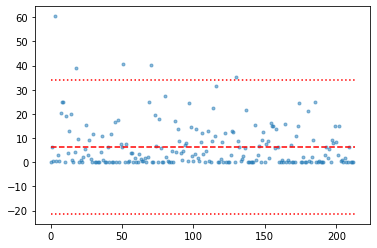

In [60]:
column = 'casesPer1000'

m = df_statistics['mean'][column]
m_p3std = df_statistics['mean'][column] + 3 * df_statistics['std'][column]
m_n3std = df_statistics['mean'][column] - 3 * df_statistics['std'][column]
y = df_filled
y = y[column]
x = range(len(y))
plt.plot([0, len(y)], [m, m], c='r', linestyle='--')
plt.plot([0, len(y)], [m_p3std, m_p3std], c='r', linestyle=':')
plt.plot([0, len(y)], [m_n3std, m_n3std], c='r', linestyle=':')
plt.scatter(x, y, marker='.', alpha=0.5, cmap='viridis')